# Lecture5　データの可視化
<div dir='rtl'>
2023.4岩政
</div>
参考にした

https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

## 簡単なLine PLot

%matplotlib inline は、jupyter notebookでplot画像をインラインで表示するためのディレクティブです。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

'figure' (plt.Figure クラスのインスタンス) は、軸、グラフィックス、テキスト、ラベルを表すすべてのオブジェクトを含む単一のコンテナです。'axes'（plt.Axesクラスのインスタンス）は、目盛りとラベルを持つ境界ボックス(bounding box)

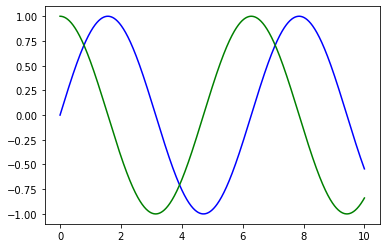

In [2]:
fig = plt.figure()
ax = plt.axes()

#最初に
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x),color='blue')
plt.plot(x, np.cos(x),color='g')

様々な線種は、plot関数のlinestyleオプションで設定します。

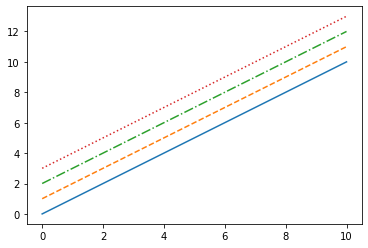

In [3]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

### プロットにラベルを追加する

プロットのラベル付けについて。タイトル、軸ラベル、そして簡単な凡例の追加。

タイトルと軸ラベルをつける簡単な例です。

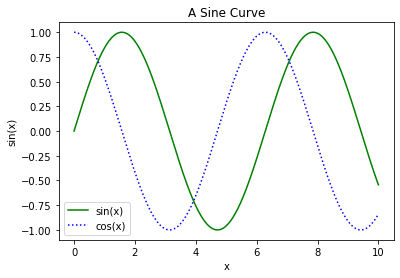

In [4]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");
#plt.axis('equal')

plt.legend();

## 散布図(Scatter Plot)
plot関数を使って1点1点異なる色とラベルを付与して散布図を表すこともできます。

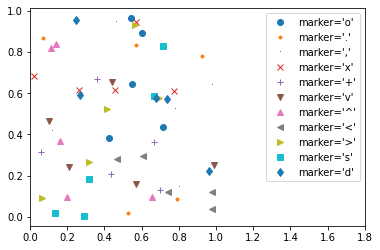

In [5]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

x、y座標及び、色の指定をリストとして散布図を描くにはscatterを使います。

多くの色や大きさの点からなるランダムな散布図。重なり合った結果をよりよく見るために、α値を使って透明度を調整します。

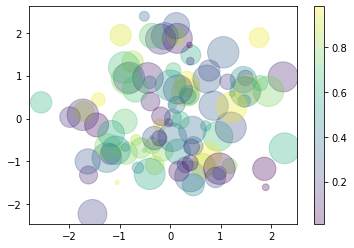

In [6]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

### Iris データを使った散布図の例
可視化の実例として、Scikit-LearnのIrisデータを使って、花びらとがく片の大きさを慎重に測定した3種類の花の中から1つずつサンプルを選ぶとします。


In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

irisデータは、sklearn.datasets.dataオブジェクトで、辞書型(dict)のサブクラスです。keys()で辞書keyを表示すると、iris.dataにデータが、iris.feature_namesにデータの項目名が格納されています。

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

sepal長、sepal幅、petal長,petal幅のリストのリストが iris.dataに格納されているようです。

データを倒置して、項目ごとのリスト(featues[])としてデータを参照できるようにし、sepal長とsepal幅をx,y座標とし、petal幅を円の大きさとする散布図を描いてみます

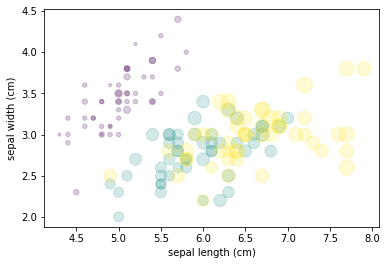

In [10]:
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## 誤差や標準偏差の可視化

### 離散的な誤差範囲の表示
１点１点離散なデータに対する誤差の範囲を表示するには、
errorbar()メソッドを使えばエラーバーを付与することができます。

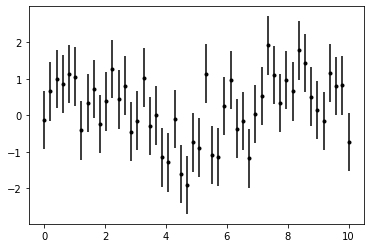

In [11]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

### 連続的な誤差の表示
連続的な量にエラーバーを表示することが望ましい場合の例として、Matplotlibのplt.plot と plt.fill_between 組み合わせて書いてみます。

参考：</br>
https://funatsu-lab.github.io/open-course-ware/machine-learning/gaussian-process/


$f(x)=x\cdot sin(x)$ を連続グラフとして描画し、離散点を幾つかこれに重ねて描きます



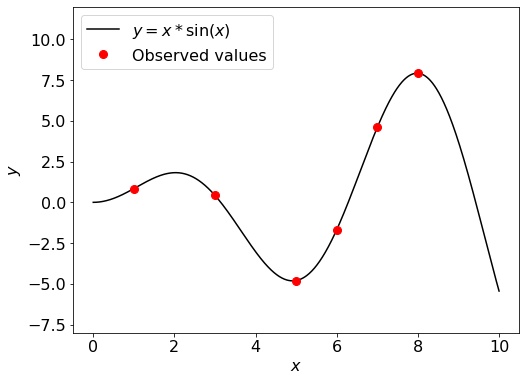

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from sklearn.preprocessing import StandardScaler

# 解析関数の定義
def f(X):
    return X * np.sin(X)
    
# データセットの作成
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y = f(X)


# データセットの可視化
plot_X = np.atleast_2d(np.linspace(0, 10, 1000)).T
fig = plt.figure(figsize=(8, 6))
plt.plot(plot_X, f(plot_X), 'k')
plt.plot(X, y, 'r.', markersize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.ylim(-8, 12)
plt.legend(['$y = x*\sin(x)$', 'Observed values'], loc='upper left', fontsize=16)
plt.tick_params(labelsize=16)
plt.show()


目的変数をStandardScalerを使って標準化します。特徴量の比率を揃えるなど、機械学習ではよく行われます。

標準化は集合の各データから平均を引き、標準偏差で割ることで求めることが出来ます。

$$ z_i= \frac{y_i-\mu}{\sigma}$$

「GPモデル」とあるのは、ガウス過程と呼ばれるモデルになります。ここではRBFカーネルに白色ノイズを追加したカーネル関数を使います。
ガウス過程については、本講義外の項目ですが以下のような特徴を持っています。

- 予測値だけでなくその分散を計算可能
- カーネル関数により柔軟にモデル選択が可能

今回は「分散を計算可能」というところを生かして、連続関数の誤差（分散のこと）を表示します。

In [14]:
# データのscaling
# scikit-learnに実装されているStandardScalerを利用
# 説明変数のscalingはしなくても問題ありませんが、目的変数のscalingは必須です(平均の事前分布を与えるのが難しいため)
scaler_y = StandardScaler().fit(y)

# GPモデルの構築
kernel = ConstantKernel() * RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0)
gpr.fit(X, scaler_y.transform(y))

c:\Python38\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1))

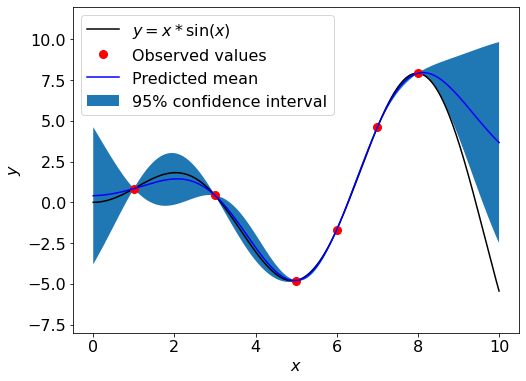

In [15]:
# plot_Xに対する平均および標準偏差の予測
pred_mu, pred_sigma = gpr.predict(plot_X, return_std=True)
pred_mu = scaler_y.inverse_transform(pred_mu)
pred_sigma = pred_sigma.reshape(-1, 1) * scaler_y.scale_

# 各xに対する95%信頼区間を表示
fig = plt.figure(figsize=(8, 6))
plt.plot(plot_X, f(plot_X), 'k')
plt.plot(X, y, 'r.', markersize=16)
plt.plot(plot_X, pred_mu, 'b')
# データが正規分布に従う場合、95%信頼区間は平均から標準偏差の1.96倍以内の区間となる
plt.fill_between(plot_X.squeeze(), (pred_mu - 1.9600 * pred_sigma).squeeze(), (pred_mu + 1.9600 * pred_sigma).squeeze())
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.ylim(-8, 12)
plt.legend(['$y = x*\sin(x)$', 'Observed values', 'Predicted mean', '95% confidence interval'], loc='upper left', fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

# matplotlibを用いて複数のプロット，グラフを描く
subplotsのパラメータ:<br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html <br>

このパラメータのうち，更なるもの（figsize[inch, inch], facecolor, edgecolorなど）は次：<br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html<br>


In [16]:
x = np.linspace(-3, 3, 20)
y1 = x
y2 = x ** 2
y3 = x ** 3
y4 = x ** 4

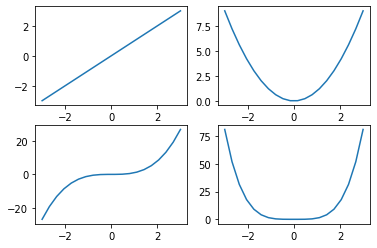

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

ax1.plot(x, y1) # upper left
ax2.plot(x, y2) # upper right
ax3.plot(x, y3) # lower left
ax4.plot(x, y4) # lower right
 
plt.show()

# タイタニックデータの可視化
英国の客船，処女航海の1912年に北大西洋上で氷山に接触し沈没した。犠牲者が多数出た。映画で何度か上映されたため，世界的に非常に有名となった。この乗客に生存に関するデータがある。

In [18]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
#import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
titanic_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv" #トレニーングデータ読込み
df = pd.read_csv(titanic_url) # df; DataFrame　の略
# df.to_csv('titanic_train.csv') # 読込んだデータの出力
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ageは，幾つか欠損している。csvファイルでは空欄となっている。欠損レコードを省くとデータ数が激減するので，補完する。補完の考え方は幾つかあり，ここでは，中央値を採用する。

In [20]:
df['Age'].fillna(df.Age.median(), inplace=True) #inplace=True は，処理軽減のため，元データを処理する

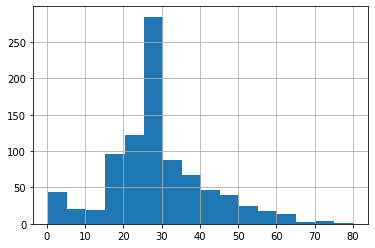

In [21]:
hist = df['Age'].hist(bins=16)
# matplotlibを用いた plt.hist(df['Age'],  bins=16)とほぼ同じ

plt.show()

乗客の年齢構成を見る

In [22]:
age1 = (df['Age'] < 15).sum()
age2 = ( (df['Age'] >= 15) & (df['Age'] < 60) ).sum()
age3 = (df['Age'] >= 60).sum()
print(age1, age2, age3, (age1+age2+age3))

78 787 26 891


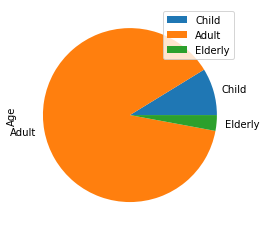

In [23]:
series = pd.Series([age1, age2, age3], index=['Child', 'Adult', 'Elderly'], name='Age')
series.plot.pie(figsize=(4, 4))

plt.legend()
plt.show()

In [24]:
cross_01 = df.pivot_table(index=['Survived'], columns=['Sex'],  \
                          values=['PassengerId'],aggfunc='count', fill_value=0)
print(cross_01)

         PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109


この棒グラフを見る

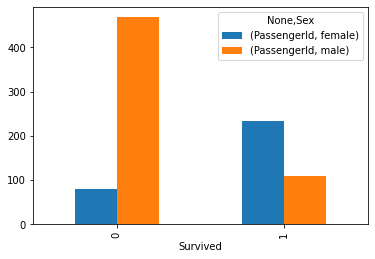

In [25]:
cross_01.plot(kind='bar')

plt.show()

船室のクラス（Pclass）と生存のクロス集計を見る

In [26]:
cross_02 = df.pivot_table(index=['Survived'], columns=['Pclass'], \
                 values=['PassengerId'], aggfunc='count', fill_value=0)
cross_02

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

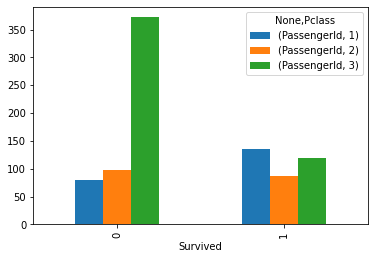

In [27]:
cross_02.plot(kind='bar')

plt.show()

上記の棒グラフを積み上げ方式に変換する

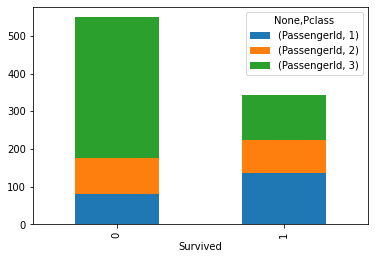

In [28]:
cross_02.plot(kind='bar', stacked=True)

plt.show()

columnsの階層化
Sexの分類のもとにPclassの分類を階層化する

In [29]:
cross_03_1 = df.pivot_table(index=['Survived'], columns=['Sex', 'Pclass'], values=['PassengerId'], aggfunc='count', fill_value=0)
cross_03_1

PassengerId                      
Sex           female         male         
Pclass             1   2   3    1   2    3
Survived                                  
0                  3   6  72   77  91  300
1                 91  70  72   45  17   47

ここまでのクロス集計は'count'であるから，valuesは何を指定してもよい。ただし，indexとcolumnsを指定したラベルは省く。

In [30]:
cross_03_2 = df.pivot_table(index=['Survived'], columns=['Sex', 'Pclass'], values=['Name'], aggfunc='count', fill_value=0)
cross_03_2

Name                      
Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

valuesを外すと，sexの上に，他の全てのラベルが階層化される

In [31]:
cross_04 = df.pivot_table(index=['Survived'], columns=['Sex'], aggfunc='count', fill_value=0)
cross_04

Age       Cabin      Embarked        Fare        Name       Parch  \
Sex      female male female male   female male female male female male female   
Survived                                                                        
0            81  468      6   62       81  468     81  468     81  468     81   
1           233  109     91   45      231  109    233  109    233  109    233   

              PassengerId      Pclass       SibSp      Ticket       
Sex      male      female male female male female male female male  
Survived                                                            
0         468          81  468     81  468     81  468     81  468  
1         109         233  109    233  109    233  109    233  109

# Iris（アイリス）データの可視化
参照<br>
http://seaborn.pydata.org/

seaborn.pairplot https://seaborn.pydata.org/generated/seaborn.pairplot.html<br>
Multiple linear regression https://seaborn.pydata.org/examples/multiple_regression.html<br>
Scatterplot with categorical variables https://seaborn.pydata.org/examples/scatterplot_categorical.html

In [32]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


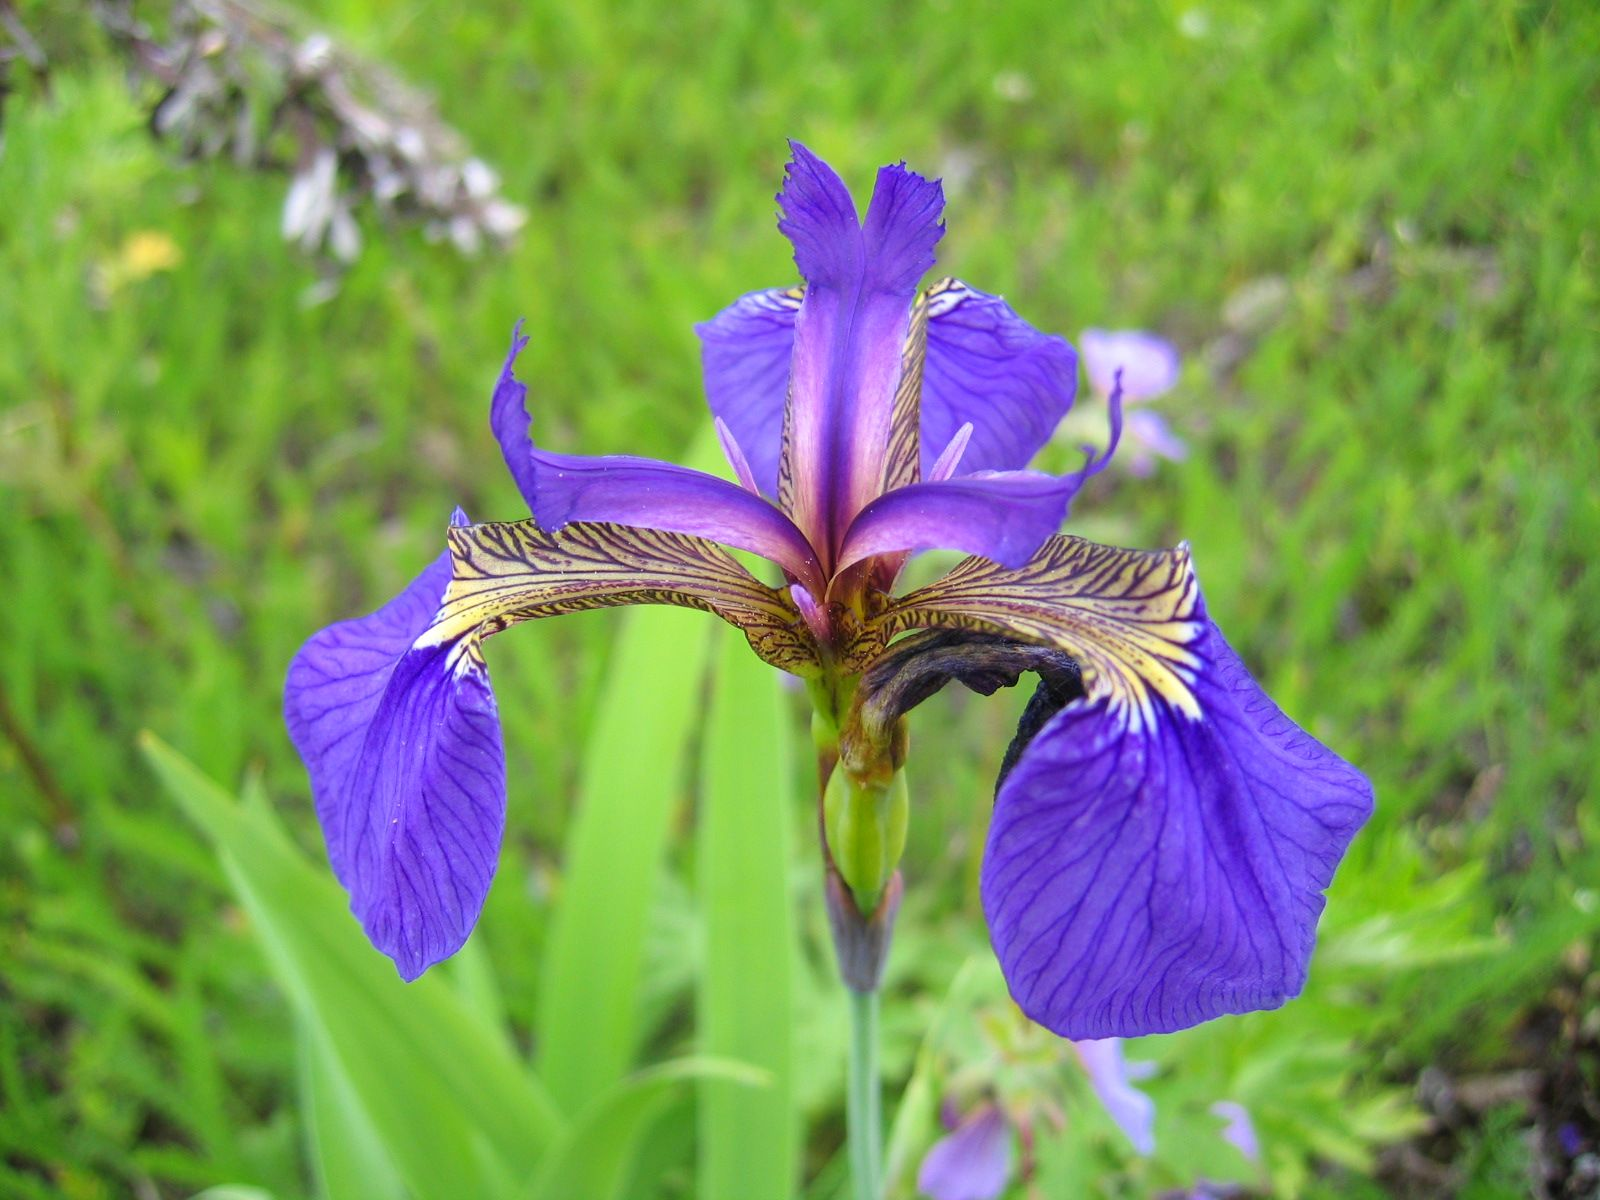

In [33]:
from IPython.display import Image
# Iris Setosa
url = 'https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg'
Image(url,width=300, height=300)

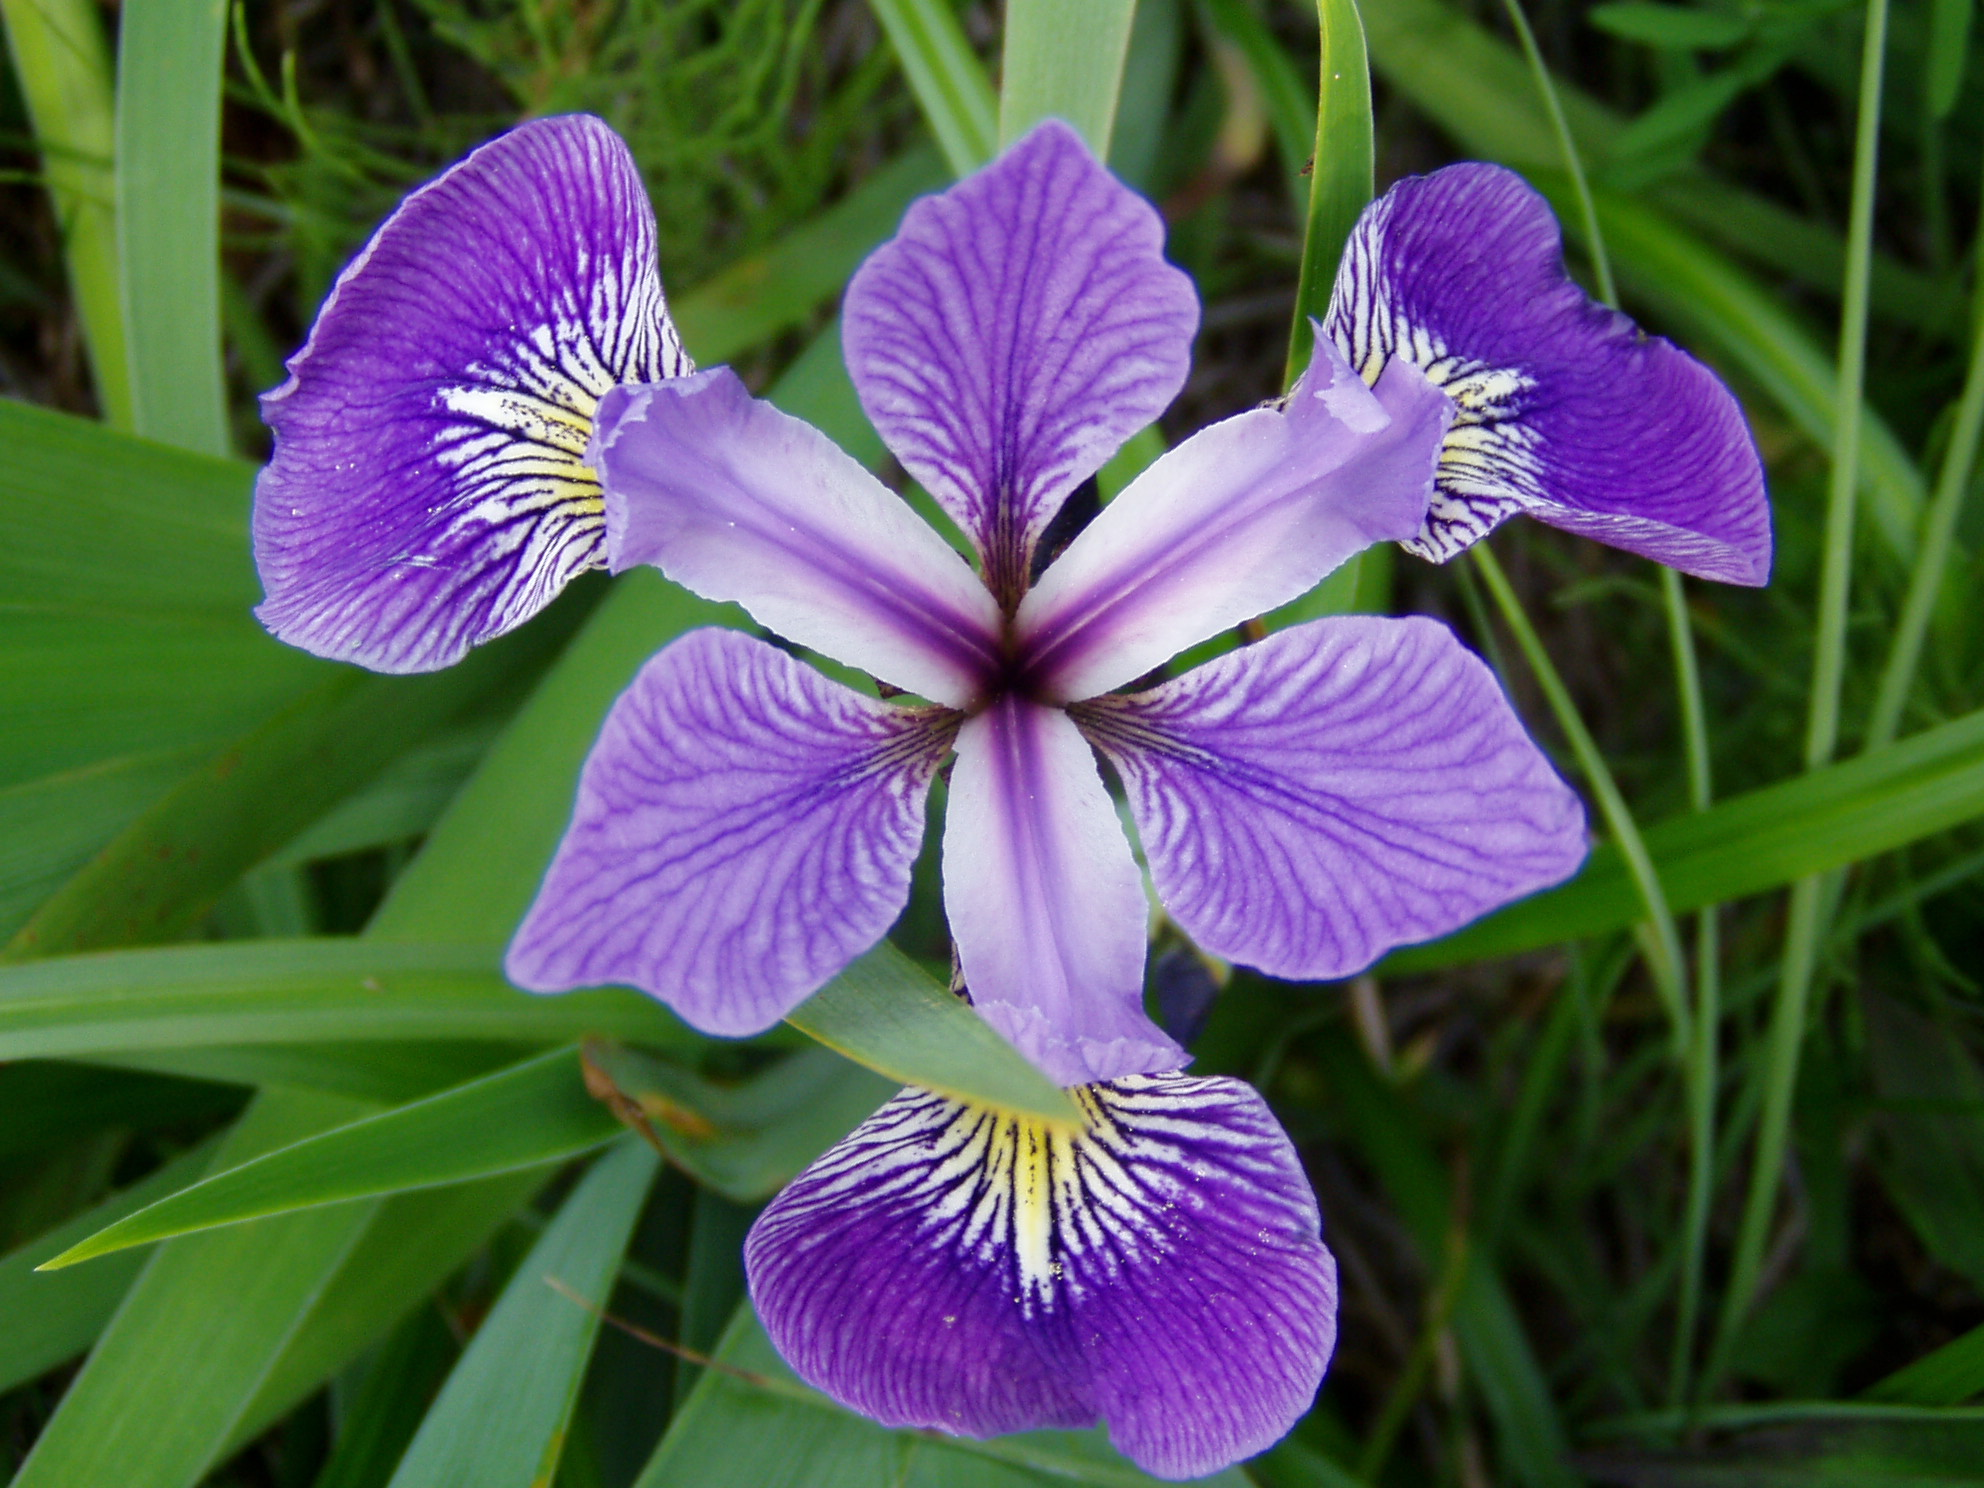

In [34]:
# Iris Versicolor
url = 'https://upload.wikimedia.org/wikipedia/commons/d/db/Iris_versicolor_4.jpg'
Image(url,width=300, height=300)

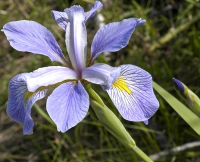

In [35]:
# Iris Virginica
url = 'https://upload.wikimedia.org/wikipedia/commons/b/b1/Virginia_Iris.png'
Image(url,width=300, height=300)

sns.set()は，Seabornのディフォルトスタイルを適用する<br>
https://seaborn.pydata.org/generated/seaborn.set.html

In [36]:
sns.set()
# Load the example tips dataset
iris = sns.load_dataset("iris") # type (iris) = pandas.core.frame.DataFrame
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## データの説明

In [37]:
type(iris)

pandas.core.frame.DataFrame

## 回帰モデルの作成と可視化(Implot)

lmplot()は，回帰モデルの作成とグラフ作成を同時に行う<br>
次の例は，横軸をsepal_length[cm], 縦軸をsepal_width[cm]とし，3種のirisそれぞれに対する回帰モデルを考える<br>
truncate=Falseは，各回帰モデルを横軸のレンジ一杯に直線を引く。=Trueは，データの範囲内だけとする<br>
size=5 はグラフのサイズ[inch], hueは色調を指定<br>
ただし，統計量は出力しない<br>
参照：<br>
http://seaborn.pydata.org/generated/seaborn.lmplot.html <br>
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

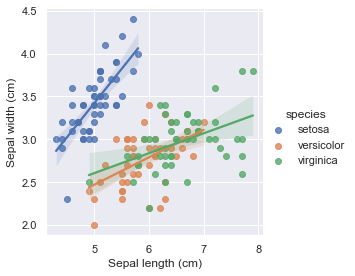

In [38]:
# Plot tip as a function of toal bill across days
# size is for old version, height is for new version.
#g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
#               truncate=True, size=4, data=iris)
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, height=4, data=iris)
# もし、FutureWaringが表示されても、無視してかまいません。

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (cm)", "Sepal width (cm)")


## 散布図(pairplot)
pairplot()は，各変数をそれぞれ組合せた散布図，すなわち，<br>
散布図行列をプロットする。<br>
参照<br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html <br>
引数diag_kind='kde'; kernel density estimate (default),  ='hist'；histogram

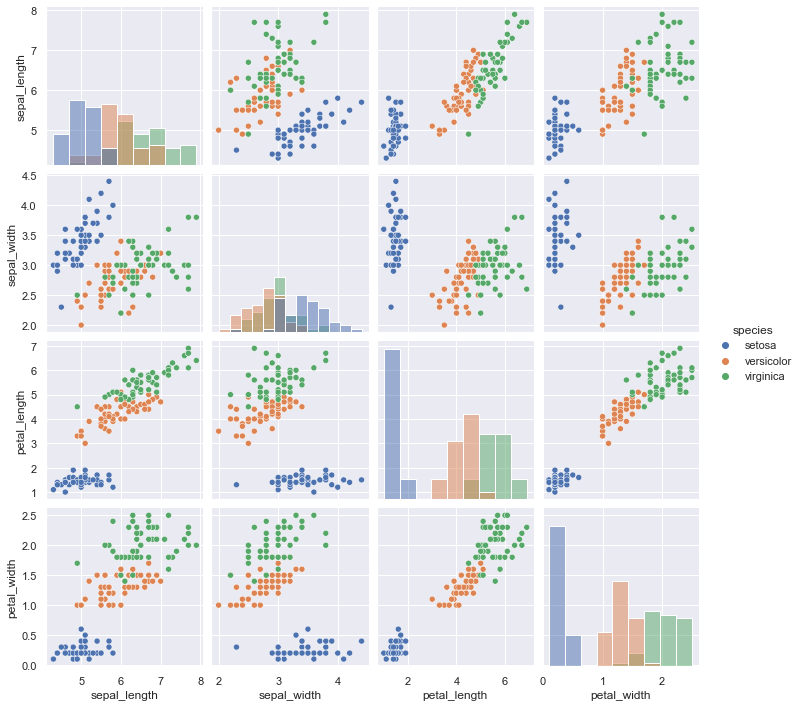

In [39]:
sns_plot = sns.pairplot(iris, hue="species", diag_kind='hist')


## ヒートマップ(heatmap)

DataFrameに対して、corr()関数は各列の間の相関係数を行列として計算します。

In [40]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


seabornのheatmap関数は、行列に対してその値に応じたheatmapを表示します
- c：Matplotlib のカラーマップまたは、オブジェクトを指定。値の大小をどの色に変換する際に用います。指定のない場合、cubehelix カラーマップ
- annot=True:　heatmapに値を同時に表示します。

先ほど計算したiris.corr()の結果をheatmapで表示します。

<AxesSubplot:>

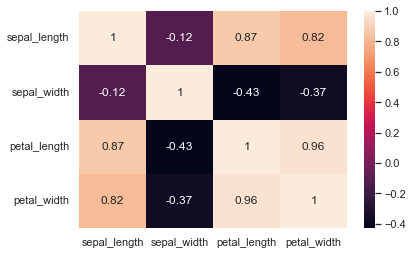

In [41]:
sns.heatmap(iris.corr(),annot=True)